In [ ]:
## Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Library to import files from local
from google.colab import files
uploaded = files.upload()

Saving ViewingActivity.csv to ViewingActivity.csv


In [ ]:
## Loading DataSet
import io

df = pd.read_csv(io.BytesIO(uploaded['ViewingActivity.csv']))

## This tells us no.of rows and columns in the dataframe we've just created
df.shape

## This helps us look at the first five rows of data
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kids,2023-04-07 10:06:51,01:27:55,NaN,A Babysitter's Guide to Monster Hunting,NaN,Reliance Jio JHSC200 MVPD STB,01:28:45,01:28:45,IN (India)
1,Kids,2023-04-07 10:06:11,00:00:37,Autoplayed: user action: None;,Trailer: A Babysitter's Guide to Monster Hunting,TRAILER,Reliance Jio JHSC200 MVPD STB,00:00:37,00:00:37,IN (India)
2,Kids,2023-04-07 10:05:58,00:00:08,Autoplayed: user action: None;,Trailer: A Babysitter's Guide to Monster Hunting,TRAILER,Reliance Jio JHSC200 MVPD STB,00:00:08,Not latest view,IN (India)
3,Kids,2023-04-07 10:05:40,00:00:04,Autoplayed: user action: None;,The New Legends of Monkey (Trailer),TRAILER,Reliance Jio JHSC200 MVPD STB,00:00:05,00:00:05,IN (India)
4,Kids,2023-04-07 10:05:29,00:00:05,Autoplayed: user action: None;,Mako Mermaids: An H2O Adventure: Season 1_hook...,HOOK,Reliance Jio JHSC200 MVPD STB,00:00:05,00:00:05,IN (India)


In [ ]:
## Since I'm only looking to analyze the amount of time I've spent watching a particular show, I'll only keep Start Time, Duration, Title columns
## and drop the rest
## axis = 1 tells Pandas to drop the columns

df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis = 1)

In [ ]:
df.head()

,Start Time,Duration,Title
0,2023-04-07 10:06:51,01:27:55,A Babysitter's Guide to Monster Hunting
1,2023-04-07 10:06:11,00:00:37,Trailer: A Babysitter's Guide to Monster Hunting
2,2023-04-07 10:05:58,00:00:08,Trailer: A Babysitter's Guide to Monster Hunting
3,2023-04-07 10:05:40,00:00:04,The New Legends of Monkey (Trailer)
4,2023-04-07 10:05:29,00:00:05,Mako Mermaids: An H2O Adventure: Season 1_hook...


In [ ]:
## Converting Strings to Datetime and Timedelta in Pandas
## If the columns are stored as objects that means they are strings
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [ ]:
## Convert Start Time to datetime (Data and Time format which Pandas can understand and perfrom calculations with)
## Convert Start Time from UTC to our local timezone (CST in our case)
## Convert Duration to timedelta (a time duration format Pandas can understand and perform calculations with)

df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [ ]:
## Change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

## Convert the time zone from UTC to Central time
df.index = df.index.tz_convert('US/Central')

## reset the index so that Start Time becomes a column again
df = df.reset_index()

df.head()

,Start Time,Duration,Title
0,2023-04-07 05:06:51-05:00,01:27:55,A Babysitter's Guide to Monster Hunting
1,2023-04-07 05:06:11-05:00,00:00:37,Trailer: A Babysitter's Guide to Monster Hunting
2,2023-04-07 05:05:58-05:00,00:00:08,Trailer: A Babysitter's Guide to Monster Hunting
3,2023-04-07 05:05:40-05:00,00:00:04,The New Legends of Monkey (Trailer)
4,2023-04-07 05:05:29-05:00,00:00:05,Mako Mermaids: An H2O Adventure: Season 1_hook...


In [ ]:
## Converting Duration column to timedelta (measure of time duration that Pandas understand)

df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, US/Central]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [ ]:
## We need to filter the Title column so that we can analyze only views of the Grey's anatomy

# create a new dataframe called greys that takes from df
# only the rows in which the Title column contains Grey's Anatomy

greys = df[df['Title'].str.contains('Grey\'s Anatomy', regex = False)]
# regex = False basically states that the prior statement is not a regular expression

greys.sample(10)
greys.shape

(562, 3)

In [ ]:
## Now we need to filter out short durations

greys = greys[(greys['Duration'] > '0 days 00:01:00')]
greys.shape
greys.head()

,Start Time,Duration,Title
21,2023-12-10 23:06:38-06:00,0 days 00:01:42,Grey's Anatomy: Season 12: Mama Tried (Episode...
22,2023-12-10 22:53:58-06:00,0 days 00:09:58,Grey's Anatomy: Season 12: You're Gonna Need S...
40,2023-12-10 13:41:33-06:00,0 days 00:14:31,Grey's Anatomy: Season 12: You're Gonna Need S...
46,2023-12-10 00:43:19-06:00,0 days 00:18:09,Grey's Anatomy: Season 12: You're Gonna Need S...
47,2023-12-10 00:22:26-06:00,0 days 00:14:15,Grey's Anatomy: Season 12: Trigger Happy (Epis...


In [ ]:
## How much time have I spent watching Grey's Anatomy?

greys['Duration'].sum()

Timedelta('7 days 19:08:49')

In [ ]:
## 1.) On which days of the week have I watched the most episodes?
## 2.) During which hours of the day do I most often start episodes?

greys['weekday'] = greys['Start Time'].dt.weekday
greys['hour'] = greys['Start Time'].dt.hour

greys.head(5)

,Start Time,Duration,Title,weekday,hour
21,2023-12-10 23:06:38-06:00,0 days 00:01:42,Grey's Anatomy: Season 12: Mama Tried (Episode...,6,23
22,2023-12-10 22:53:58-06:00,0 days 00:09:58,Grey's Anatomy: Season 12: You're Gonna Need S...,6,22
40,2023-12-10 13:41:33-06:00,0 days 00:14:31,Grey's Anatomy: Season 12: You're Gonna Need S...,6,13
46,2023-12-10 00:43:19-06:00,0 days 00:18:09,Grey's Anatomy: Season 12: You're Gonna Need S...,6,0
47,2023-12-10 00:22:26-06:00,0 days 00:14:15,Grey's Anatomy: Season 12: Trigger Happy (Epis...,6,0


<Axes: title={'center': "Grey's Anatomy Episodes watched by Day"}>

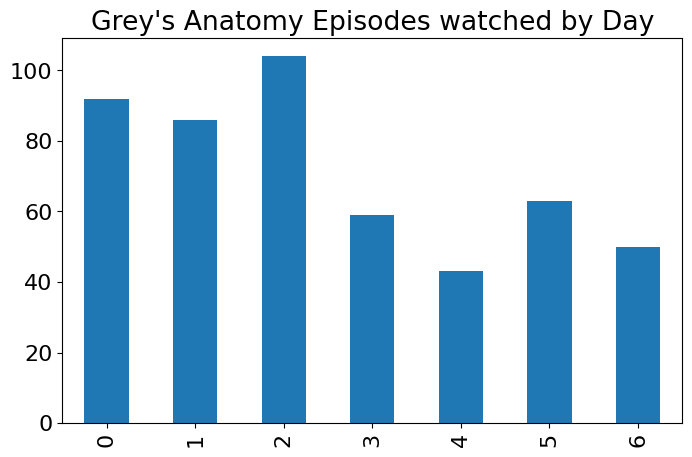

In [ ]:
## Set our categorical and define the order so that days are plotted Monday-Sunday

greys['weekday'] = pd.Categorical(greys['weekday'], categories= [0,1,2,3,4,5,6], ordered = True)

## create greys_by_day and count the rows for each weekday, assigning the result to that variable

greys_by_day = greys['weekday'].value_counts()

## sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc..
greys_by_day = greys_by_day.sort_index()

## updating the font size to make it a bit larger and easier to read
plt.rcParams.update({'font.size': 16})

## plot greys_by_day as a bar chart

greys_by_day.plot(kind = 'bar', figsize=(8,5), title = 'Grey\'s Anatomy Episodes watched by Day')

